# Entrenamiento del modelo

In [4]:
# Importamos las librerías que vamos a necesitar
# Librerías generales
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tensorflow y sklearn
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## Funciones

In [ ]:
# Convertimos un arreglo de valores en una matriz
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

## Preparación de datos

In [5]:
# Ajustamos una semilla para poder reproducir el modelo siempre igual
tf.random.set_seed(7)

In [6]:
# Cargamos el dataset
dataframe = pd.read_excel('./datasets/E162525-time-series-mantto.xlsx', usecols=[1])
dataset = dataframe.values
dataset = dataset.astype('float32')

### Como el dataset está en serie obtenemos la columna de los días de mantenimiento

In [7]:
dataset

array([[120.],
       [119.],
       [118.],
       ...,
       [  2.],
       [  1.],
       [120.]], dtype=float32)

In [8]:
# normalizamos el dataset para que ajuste los valores entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

### Vemos el dataset normalizado

In [9]:
dataset

array([[1.       ],
       [0.9921875],
       [0.984375 ],
       ...,
       [0.078125 ],
       [0.0703125],
       [1.       ]], dtype=float32)

In [10]:
# Separamos entre el set de entrenamiento y el de test
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

### Checamos el tamaño de los nuevos sets

In [16]:
print("Tamaño del set de entrenamiento", train.shape)
print("Tamaño del set de entrenamiento", test.shape)

Tamaño del set de entrenamiento (1369, 1)
Tamaño del set de entrenamiento (675, 1)


In [17]:
# Cambiamos la forma de nuestrs sets X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

### Vemos que los sets cambiaron de tamaño, esto para darle el formato que necesitaremos para el modelo

In [23]:
print("Tamaño del set trainX", trainX.shape)
print("Tamaño del set trainY", trainY.shape)
print("Tamaño del set testX", testX.shape)
print("Tamaño del set testY", testY.shape)

Tamaño del set trainX (1367, 1)
Tamaño del set trainY (1367,)
Tamaño del set testX (673, 1)
Tamaño del set testY (673,)


In [25]:
# Cambiamos la forma del dataset a [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

### El modelo LSTM necesita que los valores ingresados esté en tres dimensiones así que se cambiamos la forma del dataset de nuevo

In [26]:
print("Tamaño del set trainX", trainX.shape)
print("Tamaño del set testX", testX.shape)

Tamaño del set trainX (1367, 1, 1)
Tamaño del set testX (673, 1, 1)


In [39]:
trainX

array([[[1.       ]],

       [[0.9921875]],

       [[0.984375 ]],

       ...,

       [[0.6328125]],

       [[0.625    ]],

       [[0.6171875]]], dtype=float32)

## Creación del modelo

In [27]:
# Creamos y probamos el modelo LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1367/1367 - 3s - loss: 0.0746 - 3s/epoch - 2ms/step
Epoch 2/100
1367/1367 - 2s - loss: 0.0087 - 2s/epoch - 1ms/step
Epoch 3/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 4/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 5/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 6/100
1367/1367 - 2s - loss: 0.0052 - 2s/epoch - 1ms/step
Epoch 7/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 8/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 9/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 10/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 11/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 12/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 13/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 14/100
1367/1367 - 2s - loss: 0.0052 - 2s/epoch - 1ms/step
Epoch 15/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 16/100
1367/1367 - 2s - loss

## Predicciones

In [28]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

22/22 [==============================] - 0s 2ms/step


In [32]:
testPredict

array([[ 68.1494  ],
       [ 67.105835],
       [ 66.061844],
       [ 65.01767 ],
       [ 63.97354 ],
       [ 62.929703],
       [ 61.8864  ],
       [ 60.843918],
       [ 59.80249 ],
       [ 58.762398],
       [ 57.723923],
       [ 56.687363],
       [ 55.65298 ],
       [ 54.62109 ],
       [ 53.591988],
       [ 52.565987],
       [ 51.543396],
       [ 50.524544],
       [ 49.509766],
       [ 48.49936 ],
       [ 47.4937  ],
       [ 46.493114],
       [ 45.497948],
       [ 44.508553],
       [ 43.525295],
       [ 42.548534],
       [ 41.578617],
       [ 40.61595 ],
       [ 39.660866],
       [ 38.713764],
       [ 37.775017],
       [ 36.844997],
       [ 35.924114],
       [ 35.01273 ],
       [ 34.111237],
       [ 33.22004 ],
       [ 32.339516],
       [ 31.470047],
       [ 30.612053],
       [ 29.7659  ],
       [ 28.931992],
       [ 28.110725],
       [ 27.302471],
       [ 26.507633],
       [ 25.7266  ],
       [ 24.959743],
       [ 24.207443],
       [ 23.4

### Devolvemos los datos a sus valores originales (de entre 0 y 1 a su número original)

In [30]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [33]:
testPredict

array([[ 68.1494  ],
       [ 67.105835],
       [ 66.061844],
       [ 65.01767 ],
       [ 63.97354 ],
       [ 62.929703],
       [ 61.8864  ],
       [ 60.843918],
       [ 59.80249 ],
       [ 58.762398],
       [ 57.723923],
       [ 56.687363],
       [ 55.65298 ],
       [ 54.62109 ],
       [ 53.591988],
       [ 52.565987],
       [ 51.543396],
       [ 50.524544],
       [ 49.509766],
       [ 48.49936 ],
       [ 47.4937  ],
       [ 46.493114],
       [ 45.497948],
       [ 44.508553],
       [ 43.525295],
       [ 42.548534],
       [ 41.578617],
       [ 40.61595 ],
       [ 39.660866],
       [ 38.713764],
       [ 37.775017],
       [ 36.844997],
       [ 35.924114],
       [ 35.01273 ],
       [ 34.111237],
       [ 33.22004 ],
       [ 32.339516],
       [ 31.470047],
       [ 30.612053],
       [ 29.7659  ],
       [ 28.931992],
       [ 28.110725],
       [ 27.302471],
       [ 26.507633],
       [ 25.7266  ],
       [ 24.959743],
       [ 24.207443],
       [ 23.4

### Medimos la varianza de nuestras predicciones con el RMSE

In [34]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 9.16 RMSE
Test Score: 9.29 RMSE


# Asignamos los valores de nuestra predicción a nuestro dataset para graficar

In [35]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

In [36]:
trainPredictPlot

array([[      nan],
       [118.13912],
       [117.29396],
       ...,
       [      nan],
       [      nan],
       [      nan]], dtype=float32)

In [37]:
testPredictPlot

array([[      nan],
       [      nan],
       [      nan],
       ...,
       [13.152502],
       [12.763229],
       [      nan]], dtype=float32)

## Gráficas

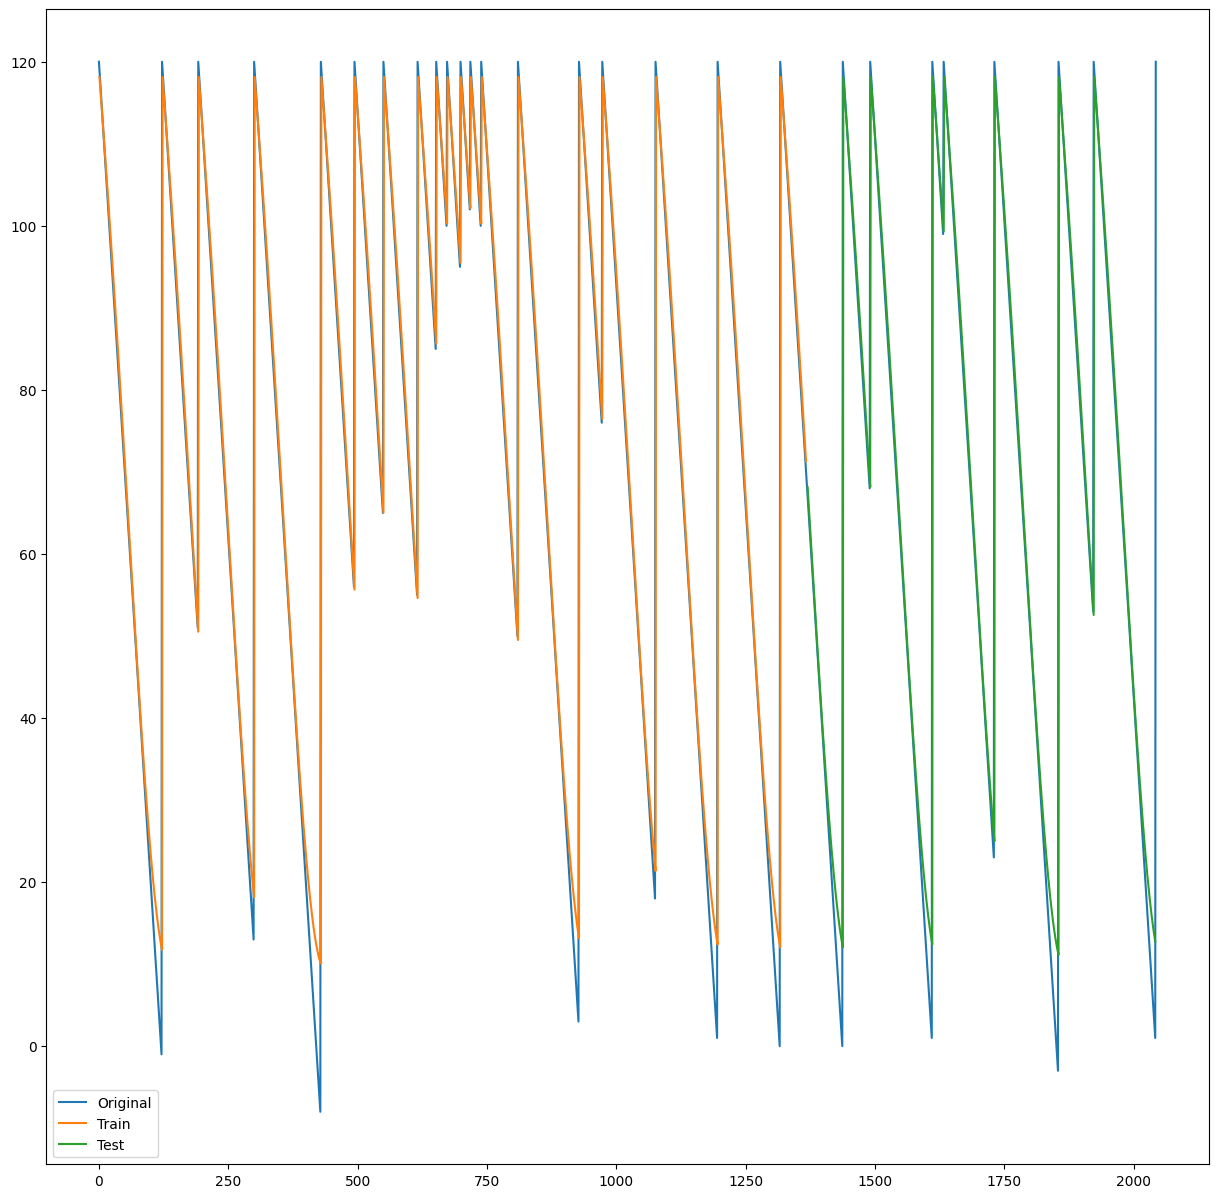

In [38]:
# plot baseline and predictions
plt.figure(figsize=(15,15))
plt.plot(scaler.inverse_transform(dataset), label="Original")
plt.plot(trainPredictPlot, label="Train")
plt.plot(testPredictPlot, label="Test")
plt.legend(loc="best")
plt.show()